In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'C:/Users/Rahul Shinde/OneDrive - Nettur Technical Training Foundation/Desktop/meghapy/internproject/supply_chain_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [10]:
# Check for missing values and data types
missing_data = data.isnull().sum()
data_types = data.dtypes

# Display missing values and column data types
#missing_data, data_types
print("Missing Data:\n", missing_data)
print("\nData Types:\n", data_types)


Missing Data:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

Data Types:
 Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels     

In [11]:
import numpy as np
# Check for negative values in numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Identify rows with negative values in numeric columns
negative_values = data[numeric_columns].lt(0).any(axis=1)

# Check for duplicate rows
duplicates = data.duplicated().sum()

# Display results
#negative_values.any(), duplicates
print("\nAny Negative Values in Numeric Columns:", negative_values.any())
print("\nNumber of Duplicate Rows:", duplicates)



Any Negative Values in Numeric Columns: False

Number of Duplicate Rows: 0


In [12]:
# Function to standardize text columns (capitalize each word)
def standardize_text_column(column):
    return column.str.title()

# List of columns to standardize (adjust based on your dataset)
text_columns = ['Product type', 'Customer demographics', 'Supplier name', 'Location']

# Apply the standardization
for col in text_columns:
    if col in data.columns:
        data[col] = standardize_text_column(data[col])

# Display the first few rows to check the changes
data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,Haircare,SKU0,69.808006,55,802,8661.996792,Non-Binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,Skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,Haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,Skincare,SKU3,61.163343,68,83,7766.836426,Non-Binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,Skincare,SKU4,4.805496,26,871,2686.505152,Non-Binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [13]:
# Remove duplicates
data = data.drop_duplicates()

# Verify if duplicates are removed
print("\nNumber of Duplicate Rows after Removal:", data.duplicated().sum())



Number of Duplicate Rows after Removal: 0


In [2]:
# Fill missing values (if any) with a placeholder or drop rows
data = data.fillna('Unknown')  # Or use dropna() to remove rows with missing values


In [3]:
# Save the cleaned data to a new CSV file
data.to_csv('cleaned_supply_chain_data.csv', index=False)


In [4]:
# Summary of the dataset
summary = data.describe(include='all')

# Save summary to a file
with open('data_summary.txt', 'w') as f:
    f.write(summary.to_string())


In [18]:
report = f"""
# Data Cleaning Report

## 1. Dataset Overview
- Total Rows: {data.shape[0]}
- Total Columns: {data.shape[1]}

## 2. Cleaning Summary
- Missing Values: Handled by {'filling with "Unknown"' if 'Unknown' in data.isnull().sum() else 'removing rows with missing values'}.
- Duplicate Rows: Removed ({duplicates} duplicates initially found).
- Negative Values in Numeric Columns: {'None found' if not negative_values.any() else 'Handled appropriately'}.

## 3. Standardization
- Text columns (e.g., Product Type, Location) were standardized to title-case for consistency.

## 4. Insights
- [Add any findings or observations after cleaning the data.]

## 5. Recommendations
- [Add suggestions or actions based on the cleaned data.]

"""

# Save the report to a file
with open('cleaning_report.txt', 'w') as f:
    f.write(report)


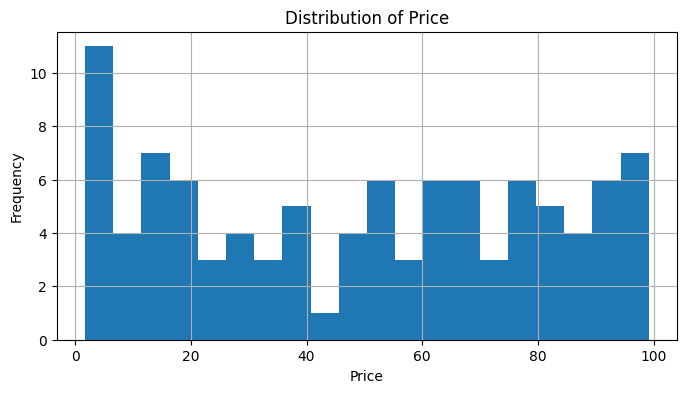

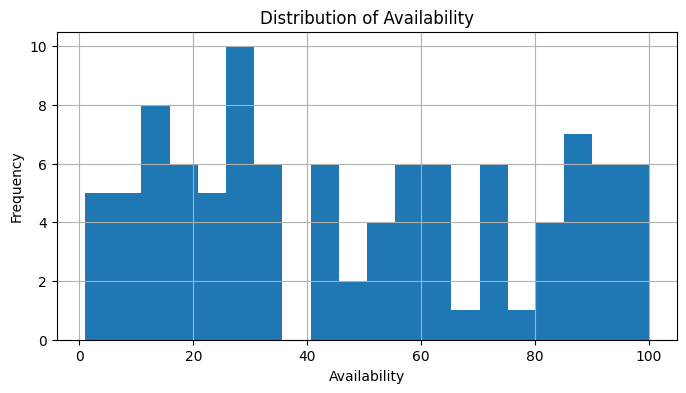

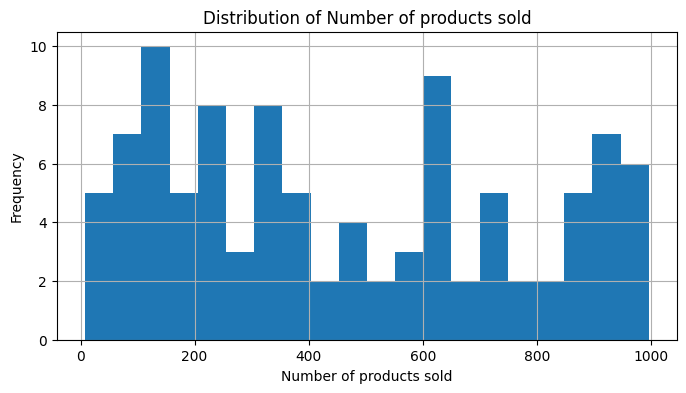

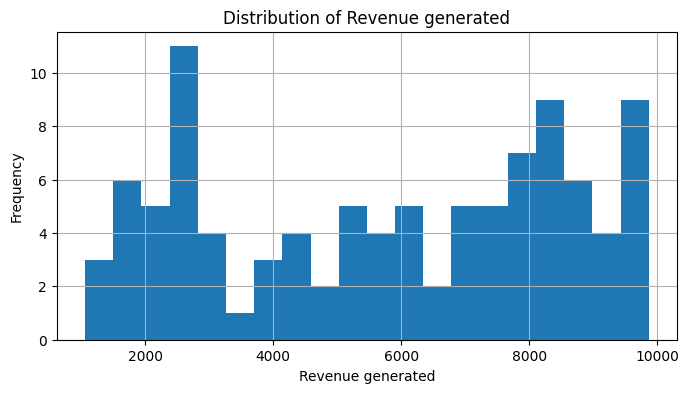

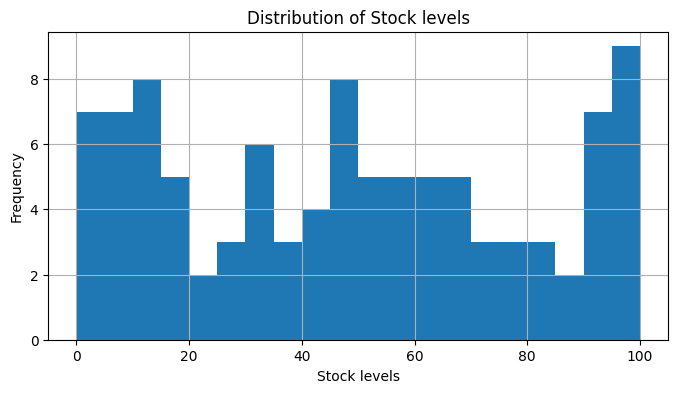

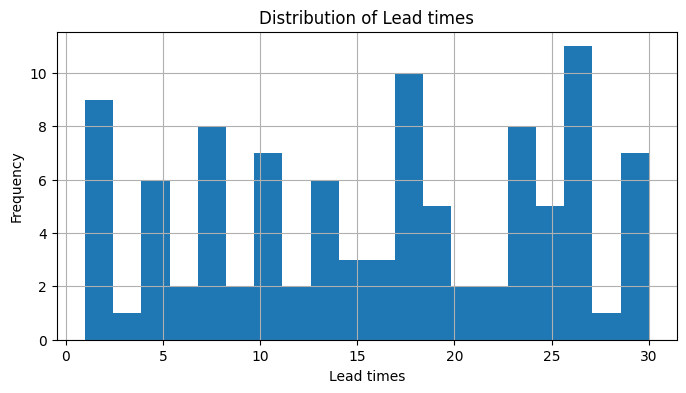

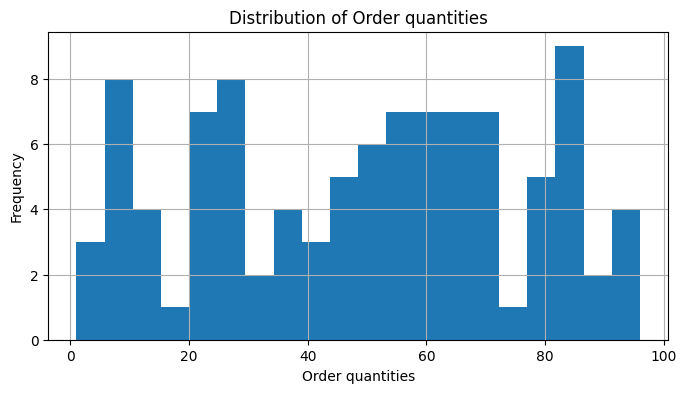

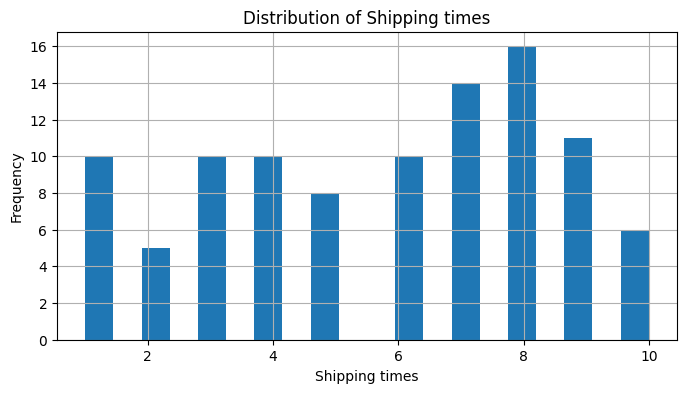

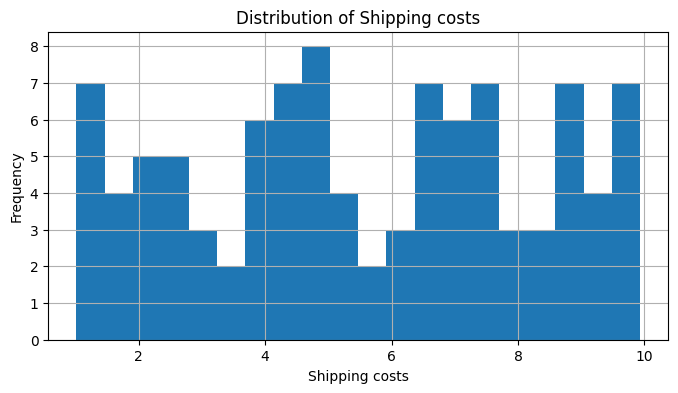

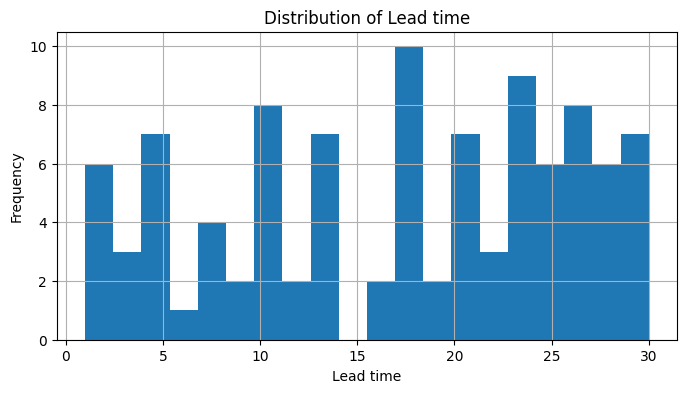

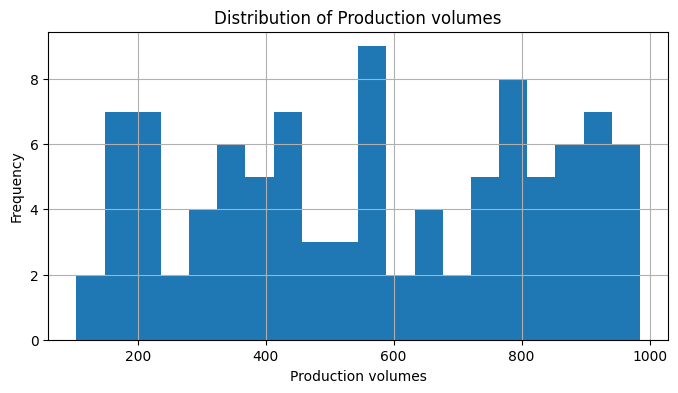

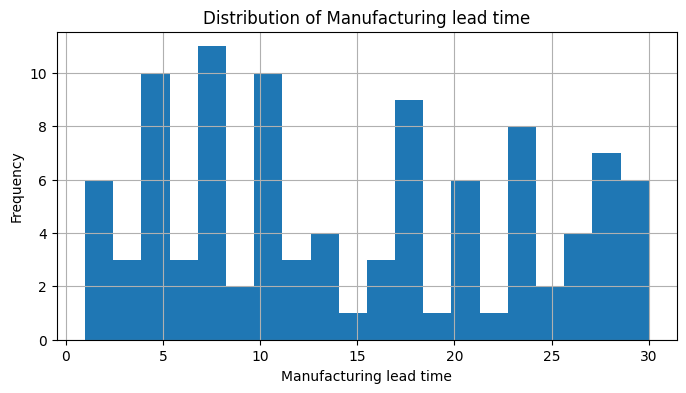

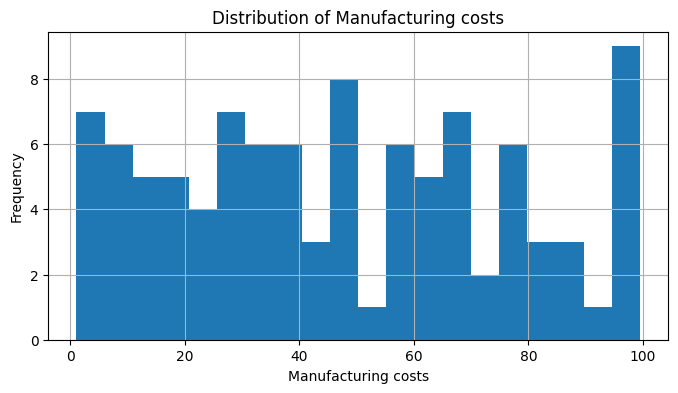

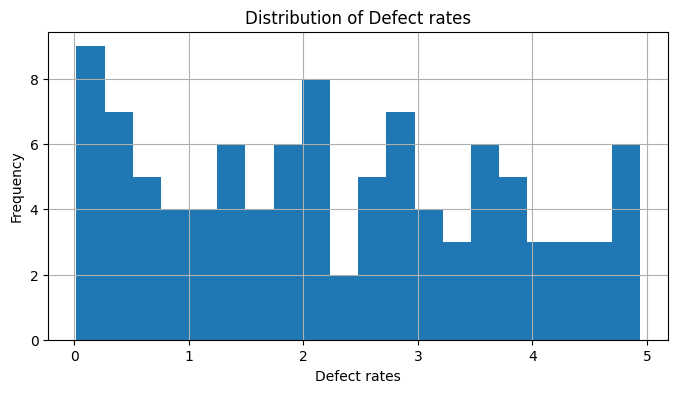

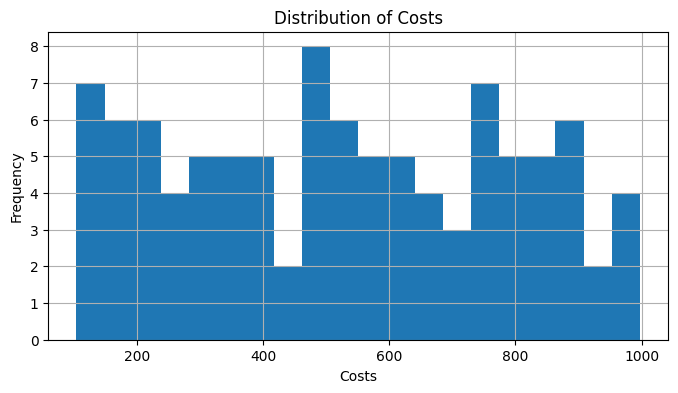

In [19]:
import matplotlib.pyplot as plt

# Example: Plot distribution of numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    data[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'{col}_distribution.png')  # Save each plot as an image
    plt.show()
